<a href="https://colab.research.google.com/github/oyyarko/keras_tut/blob/master/handwritten_digits_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1
Import required libraries (Keras, numpy)

Load the database

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
import numpy as np

#Step 2
Split data into Training and Testing sets

Assign values to epoch, batch_size, verbose, classes(Optional)

In [0]:
batch_size = 128
epochs = 12
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data() #we splitted data here

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#Step 3
Visualize initial data from the dataset using matplotlib

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

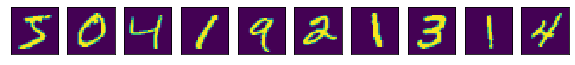

In [19]:
fig = plt.figure(figsize=(10, 20))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    

#Step 4
Convert Vector integers to binary metrices

Called One-hot Encoding

In [0]:
import keras

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Step 5
Create our Model

In [25]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))

model.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
To

#Step 6
Compile our model

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#Step 7
Fit our model

In [28]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 11s 185us/step - loss: 11.1103 - acc: 0.3079 - val_loss: 8.9012 - val_acc: 0.4467
Epoch 2/12
60000/60000 [==============================] - 2s 28us/step - loss: 8.0682 - acc: 0.4974 - val_loss: 6.0458 - val_acc: 0.6239
Epoch 3/12
60000/60000 [==============================] - 2s 27us/step - loss: 6.8351 - acc: 0.5743 - val_loss: 5.7780 - val_acc: 0.6407
Epoch 4/12
60000/60000 [==============================] - 2s 28us/step - loss: 6.3981 - acc: 0.6011 - val_loss: 5.6212 - val_acc: 0.6506
Epoch 5/12
60000/60000 [==============================] - 2s 28us/step - loss: 5.9880 - acc: 0.6263 - val_loss: 4.3955 - val_acc: 0.7249
Epoch 6/12
60000/60000 [==============================] - 2s 28us/step - loss: 4.9348 - acc: 0.6915 - val_loss: 3.5155 - val_acc: 0.7806
Epoch 7/12
60000/60000 